 **Clasificación de Imagenes en Keras con una CNN**


In [ ]:
import numpy as np                  
import matplotlib.pyplot as plt      
import random                     
from keras.datasets import mnist
from keras.utils import np_utils                         
from tensorflow import keras
import tensorflow.keras.layers as LK
import tensorflow.keras.models as MK

#Cargar datos de entrenamiento y visualización

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


Visualizar las imagenes

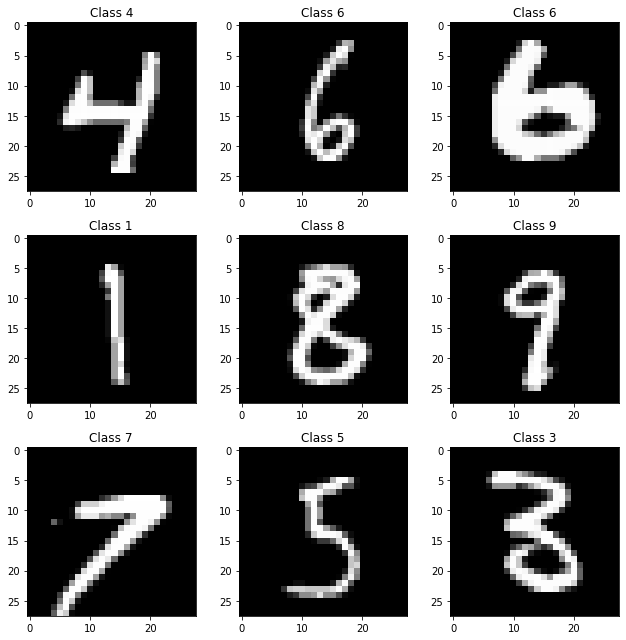

In [ ]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

Imagenes como matriz

In [ ]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# now print!        
matprint(X_train[num])

0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0   14  197  254  254  254  187  144   96   34   25    0    0    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0  100  253  253  253  253  253  253  253  254  233  177   71   23    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0   17  149  154  154  149   44   78  154  211  253  253  253  201   22    0   0  0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0    0    0    6   40  121  248  253  113    0   0  0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0    0    0    0   15  100 

In [ ]:
print(type(X_train))
print(X_train[0])

<class 'numpy.ndarray'>
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 25

In [ ]:
X_train = X_train.astype('float32')   
X_test = X_test.astype('float32')

#Normalización
X_train /= 255                       
X_test /= 255

print("Dimensiones Matrices de Entrenamiento", X_train.shape)
print("Dimensiones Matrices de Validación", X_test.shape)

Dimensiones Matrices de Entrenamiento (60000, 28, 28)
Dimensiones Matrices de Validación (10000, 28, 28)


In [ ]:
print(X_train[0])
print(y_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Para la clasificacion es necesario el one-hot format

In [ ]:
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [ ]:
print(y_train[0])
print(Y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


#Construccion de la Red

In [ ]:
# modelo = keras.models.Sequential()
# modelo.add(keras.layers.Conv2D(16, (3, 3),padding='same' ,input_shape=(28, 28, 1),use_bias=False))
# modelo.add(keras.layers.BatchNormalization())
# modelo.add(keras.layers.Activation("relu"))
# modelo.add(keras.layers.MaxPooling2D((2, 2)))
# modelo.add(keras.layers.Conv2D(32, (3, 3), padding='same',use_bias=False))
# modelo.add(keras.layers.BatchNormalization())
# modelo.add(keras.layers.Activation("relu"))
# modelo.add(keras.layers.MaxPooling2D((2, 2)))
# modelo.add(keras.layers.Conv2D(64, (3, 3),padding='same',use_bias=False))
# modelo.add(keras.layers.BatchNormalization())
# modelo.add(keras.layers.Activation("relu"))
# modelo.add(keras.layers.Flatten())
# modelo.add(keras.layers.Dense(10, activation='softmax'))

# modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        144       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 16)       64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 28, 28, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4608      
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 32)       1

In [ ]:
def crear_modelo():
  modelo= MK.Sequential([
      LK.Conv2D(16,(3,3), padding='same', activation= 'relu', input_shape=(28,28,1)),
      LK.BatchNormalization(),
      LK.MaxPooling2D(2,2),
      LK.Conv2D(32,(3,3), padding='same', activation= 'relu'),
      LK.BatchNormalization(),
      LK.MaxPooling2D(2,2),
      LK.Conv2D(64,(3,3), padding='same', activation= 'relu'),
      LK.BatchNormalization(),
      LK.Flatten(),
      LK.Dense(10, activation= 'softmax')
  ])
  return modelo

In [ ]:
Modelo1= crear_modelo()
Modelo1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 batch_normalization_6 (Batc  (None, 28, 28, 16)       64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 batch_normalization_7 (Batc  (None, 14, 14, 32)       128       
 hNormalization)                                                 
                                                      

In [ ]:
Modelo1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Entrenando el modelo

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
batch_size = 128
cb = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True, start_from_epoch=10,)
history_ES = Modelo1.fit(X_train, Y_train, epochs=100, batch_size=batch_size, validation_data=(X_test, Y_test), callbacks=[cb], verbose=1)

Epoch 1/100
469/469 [==============================] - 17s 11ms/step - loss: 0.1119 - accuracy: 0.9653 - val_loss: 0.2651 - val_accuracy: 0.9071
Epoch 2/100
469/469 [==============================] - 6s 13ms/step - loss: 0.0406 - accuracy: 0.9869 - val_loss: 0.0569 - val_accuracy: 0.9820
Epoch 3/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0271 - accuracy: 0.9911 - val_loss: 0.0418 - val_accuracy: 0.9874
Epoch 4/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0186 - accuracy: 0.9936 - val_loss: 0.0434 - val_accuracy: 0.9872
Epoch 5/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0138 - accuracy: 0.9956 - val_loss: 0.0408 - val_accuracy: 0.9891
Epoch 6/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0110 - accuracy: 0.9962 - val_loss: 0.0571 - val_accuracy: 0.9864
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0133 - accuracy: 0.9956 - val_loss: 0.0434 - val_accuracy: 0.9

Evaluando el modelo

In [ ]:
Metricas= Modelo1.evaluate(X_test, Y_test)
print('Pérdida (Loss) de validación:', Metricas[0])
print('Precición (accuracy) de validación:', Metricas[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0442 - accuracy: 0.9925
Pérdida (Loss) de validación: 0.0442146435379982
Precición (accuracy) de validación: 0.9925000071525574


Verificando la salida

In [ ]:
predicted_classes_Temp = Modelo1.predict(X_test)
predicted_classes =np.argmax(predicted_classes_Temp, axis=1)
test_classes= np.argmax(Y_test, axis=1)
correct_indices = np.nonzero(predicted_classes == test_classes)[0]
incorrect_indices = np.nonzero(predicted_classes != test_classes)[0]
print(len(test_classes))
print(len(correct_indices))
print(len(incorrect_indices))

313/313 [==============================] - 1s 3ms/step
10000
9925
75


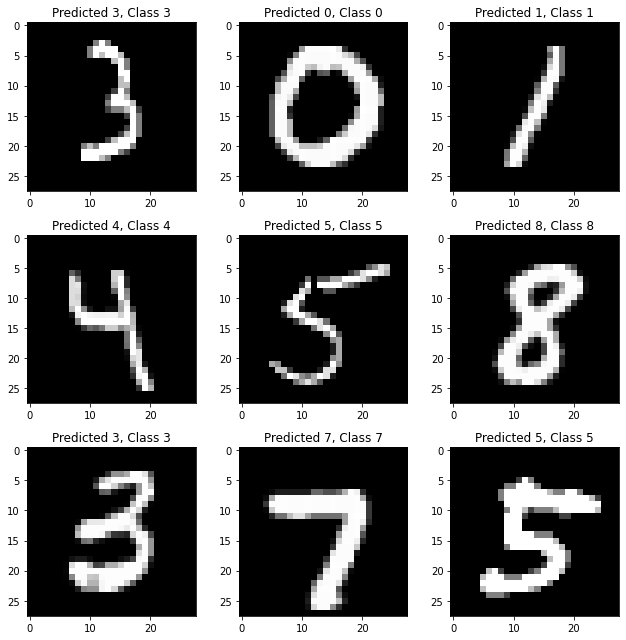

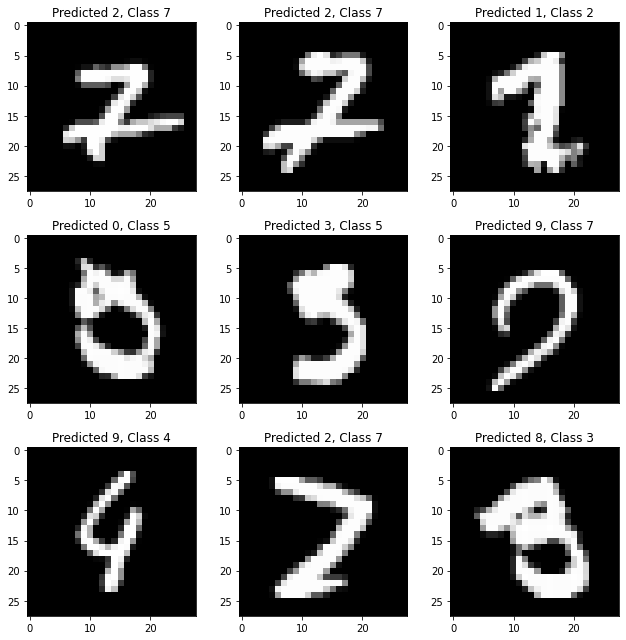

In [ ]:
plt.figure()
Indices_Correctos=np.random.permutation(len(correct_indices))
for i, correct in enumerate(correct_indices[Indices_Correctos[:9]]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_classes[correct]))
    
plt.tight_layout()

Indices_Incorrectos=np.random.permutation(len(incorrect_indices))
plt.figure()
for i, incorrect in enumerate(incorrect_indices[Indices_Incorrectos[:9]]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_classes[incorrect]))
    
plt.tight_layout()

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      1.00      1.00      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       1.00      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 979    0    0    0    0    0    0    1    0    0]
 [   0 1126    0    1    1    0    3    0    4    0]
 [   0    1 1030    0    0    0    1    0    0    0]
 [   0    1    0 1004    0    4    0    0    1    0]
 [   0    0    0    0  972   

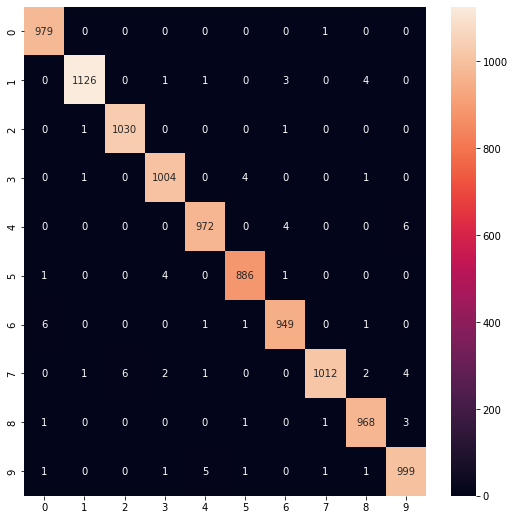

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pandas as pd

y_pred_class = predicted_classes
y_test_class = test_classes
#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support
cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

#Probar datos propios

Imagen original:  (648, 1152, 3)
Imagen resize:  (28, 28, 3)
Imagen escala de grises:  (28, 28)
Imagen expandida:  (1, 28, 28)
1/1 [==============================] - 0s 30ms/step


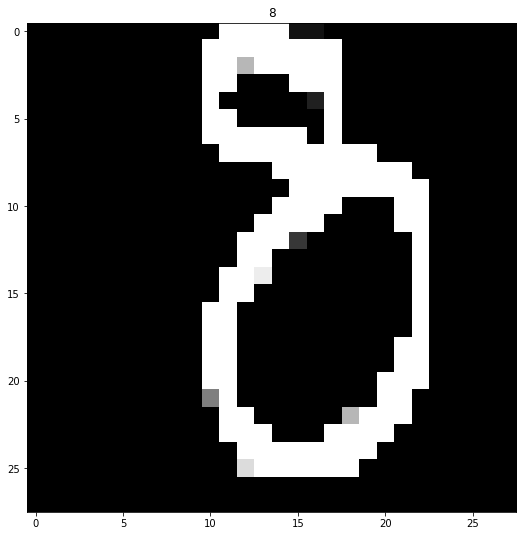

In [ ]:
import io
import cv2
classnames= ['0','1','2','3','4','5','6','7','8','9']
img=cv2.imread("/content/8.png")
print("Imagen original: ", img.shape)
img2=cv2.resize(img,(28,28))
print("Imagen resize: ", img2.shape)
img_cvt=cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)
print("Imagen escala de grises: ", img_cvt.shape)
img2=np.expand_dims(img_cvt,0)
print("Imagen expandida: ", img2.shape)
prediction=Modelo1.predict(img2)
plt.imshow(img_cvt, cmap='gray')
plt.title(classnames[np.argmax(prediction)])
plt.show()